In [12]:
import pandas as pd
import numpy as np
import time
from tqdm import tqdm
import warnings
import matplotlib.pyplot as plt
import missingno as msno
from datetime import timedelta
import os
import sys
sys.path.append('/Users/sdc/Documents/bida_lab/db/P1_extubationfailure/서대철')
import src.utils.utils as util   # 기타 유틸리티 모듈

from src.subjectlist_alignment import reintubation as rnt
from src.subjectlist_alignment import subject_classification as cls

In [7]:
data_dir = '../outputs/subjects_df.csv'

df = pd.read_csv(data_dir, index_col=0)

# datetime 변환
time_cols = ['admittime', 'intubationtime', 'extubationtime', 'dischtime', 'deathtime', 'reintubation_eventtime']
df = util.to_datetime(df, time_cols)
print(df.shape)
df.head()

Converted admittime to datetime.
Converted intubationtime to datetime.
Converted extubationtime to datetime.
Converted dischtime to datetime.
Converted deathtime to datetime.
Converted reintubation_eventtime to datetime.
(9008, 27)


,subject_id,hadm_id,int_stayid,admittime,intubationtime,int_itemid,int_weight,ext_stayid,extubationtime,ext_itemid,...,reintubation_eventtime,reintubationtime,seq_num,mvtime,final_event,ext_to_death,ext_to_disch,disch_to_death,class_code,class
0,10001884,26184834,37510196.0,2131-01-07 20:39:00,2131-01-11 04:30:00,224385.0,65.0,37510196.0,2131-01-12 17:40:00,227194.0,...,NaT,NaN,1,False,True,10775.0,10775.0,0.0,11,nonfailure
1,10003400,23559586,38383343.0,2137-08-04 00:07:00,2137-08-17 21:21:00,224385.0,90.5,38383343.0,2137-08-21 15:40:00,227194.0,...,NaT,NaN,1,False,True,17365.0,17365.0,0.0,11,nonfailure
2,10004401,27939719,31202136.0,2144-04-11 03:31:00,2144-04-11 05:03:00,224385.0,120.0,NaN,2144-04-13 17:31:00,NaN,...,NaT,NaN,1,False,True,NaN,0.0,NaN,121,nonfailure
3,10004401,29988601,32773003.0,2144-01-23 07:58:00,2144-01-27 19:00:00,224385.0,76.0,32773003.0,2144-01-30 12:30:00,227194.0,...,2144-01-30 13:00:00,30.0,1,False,False,NaN,10035.0,NaN,211,failure
4,10004401,29988601,32773003.0,2144-01-23 07:58:00,2144-01-30 13:00:00,224385.0,76.0,NaN,2144-02-06 11:45:00,NaN,...,NaT,NaN,2,False,True,NaN,0.0,NaN,2221,nonfailure


In [8]:
df.columns

Index(['subject_id', 'hadm_id', 'int_stayid', 'admittime', 'intubationtime',
       'int_itemid', 'int_weight', 'ext_stayid', 'extubationtime',
       'ext_itemid', 'ext_weight', 'extubationcause', 'dischtime', 'deathtime',
       'marker', 'reint_marker', 'intext_duration', 'reintubation_eventtime',
       'reintubationtime', 'seq_num', 'mvtime', 'final_event', 'ext_to_death',
       'ext_to_disch', 'disch_to_death', 'class_code', 'class'],
      dtype='object')

In [9]:
df[df.intubationtime == df.extubationtime].reint_marker

1557    False
2392    False
3043    False
3277    False
4395    False
Name: reint_marker, dtype: bool

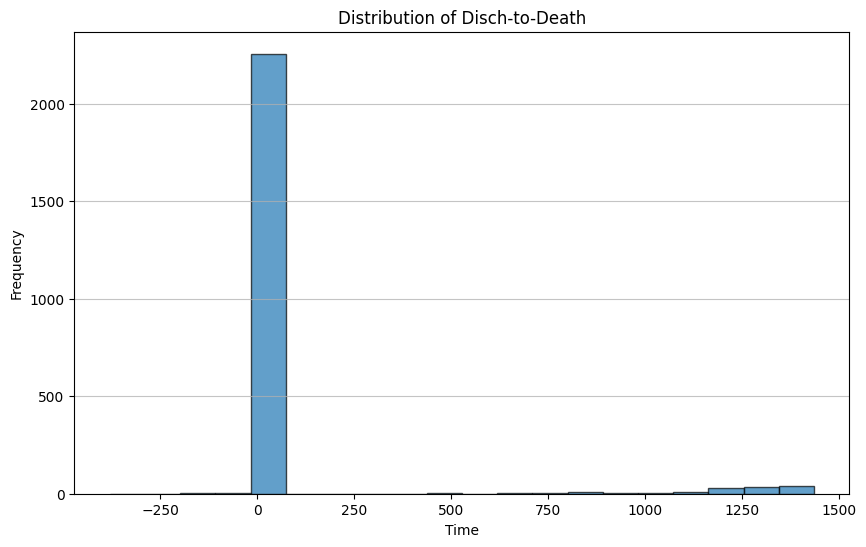

In [14]:
# Create the plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.hist(df['disch_to_death'], bins=20, edgecolor='k', alpha=0.7)  # Adjust bins as needed
plt.title('Distribution of Disch-to-Death')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [26]:
df[df.disch_to_death.notna()]['disch_to_death'].min()

-381.0

In [27]:
df. 

array([False,  True])

In [30]:
subjectlist1 = df[df.intubationtime != df.extubationtime]
print(subjectlist1.shape)

(9003, 27)


In [32]:
subjectlist2 = subjectlist1[subjectlist1.mvtime == False]
print(subjectlist2.shape)

(6823, 27)


In [35]:
subjectlist1.to_csv('../outputs/subjectlist1.csv')
subjectlist2.to_csv('../outputs/subjectlist2.csv')

print(subjectlist1.shape)   # mvtime 포함
print(subjectlist2.shape)   # mvtime 제거

(9003, 27)
(6823, 27)
